In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
t_range = pd.date_range('2016-01-01', '2016-12-31')

In [3]:
t_range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

如何对于一年的数据进行采样

In [4]:
s1 = Series(np.random.randn(len(t_range)), index=t_range)
s1.head()

2016-01-01    0.616404
2016-01-02   -1.671096
2016-01-03   -1.019273
2016-01-04   -2.058814
2016-01-05    0.677652
Freq: D, dtype: float64

将366天的数据变为每月一个的数据

In [5]:
s1['2016-01'].mean()

-0.15706251895218226

算出一月份数据的平均值来代替一月份的这些数据

>对于数据按月份来进行采样，可以使用resample方法

In [6]:
s1_month = s1.resample('M').mean()
s1_month

2016-01-31   -0.157063
2016-02-29   -0.120037
2016-03-31    0.564164
2016-04-30    0.013252
2016-05-31    0.357117
2016-06-30    0.106408
2016-07-31    0.254165
2016-08-31    0.105338
2016-09-30    0.212510
2016-10-31    0.019801
2016-11-30   -0.205516
2016-12-31    0.575381
Freq: M, dtype: float64

In [7]:
s1_month.index

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

上面的操作时我们将s1的数据采样从每天变成了每月，采样率变低了。

- 当然我们也可以通过提高采样率，让数据变多

但是数据如何填充:

- ffill() forward fill 通过一月1号数据来填充一月一号每小时的数据。
- bfill() 一月一号之后的数据都是通过1月2号来填充的。

In [8]:
s1.resample('H').ffill()

2016-01-01 00:00:00    0.616404
2016-01-01 01:00:00    0.616404
2016-01-01 02:00:00    0.616404
2016-01-01 03:00:00    0.616404
2016-01-01 04:00:00    0.616404
2016-01-01 05:00:00    0.616404
2016-01-01 06:00:00    0.616404
2016-01-01 07:00:00    0.616404
2016-01-01 08:00:00    0.616404
2016-01-01 09:00:00    0.616404
2016-01-01 10:00:00    0.616404
2016-01-01 11:00:00    0.616404
2016-01-01 12:00:00    0.616404
2016-01-01 13:00:00    0.616404
2016-01-01 14:00:00    0.616404
2016-01-01 15:00:00    0.616404
2016-01-01 16:00:00    0.616404
2016-01-01 17:00:00    0.616404
2016-01-01 18:00:00    0.616404
2016-01-01 19:00:00    0.616404
2016-01-01 20:00:00    0.616404
2016-01-01 21:00:00    0.616404
2016-01-01 22:00:00    0.616404
2016-01-01 23:00:00    0.616404
2016-01-02 00:00:00   -1.671096
2016-01-02 01:00:00   -1.671096
2016-01-02 02:00:00   -1.671096
2016-01-02 03:00:00   -1.671096
2016-01-02 04:00:00   -1.671096
2016-01-02 05:00:00   -1.671096
                         ...   
2016-12-

时间序列的数据是非常适合画一个基于时间轴的图(股票数据)

In [9]:
t_range = pd.date_range('2016-01-01', '2016-12-31', freq='H')

In [10]:
t_range

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-12-30 15:00:00', '2016-12-30 16:00:00',
               '2016-12-30 17:00:00', '2016-12-30 18:00:00',
               '2016-12-30 19:00:00', '2016-12-30 20:00:00',
               '2016-12-30 21:00:00', '2016-12-30 22:00:00',
               '2016-12-30 23:00:00', '2016-12-31 00:00:00'],
              dtype='datetime64[ns]', length=8761, freq='H')

In [11]:
stock_df = DataFrame(index=t_range)
# 创建一个空dataframe

In [12]:
stock_df['BABA'] = np.random.randint(80, 160, size=len(t_range))

In [13]:
stock_df['TENCENT'] = np.random.randint(30, 50, size=len(t_range))

整数在价格范围内，随机产生

In [14]:
stock_df.head()

,BABA,TENCENT
2016-01-01 00:00:00,141,35
2016-01-01 01:00:00,106,42
2016-01-01 02:00:00,99,46
2016-01-01 03:00:00,96,47
2016-01-01 04:00:00,106,36


plot()通过plot方法创建一个图

In [15]:
stock_df.plot()

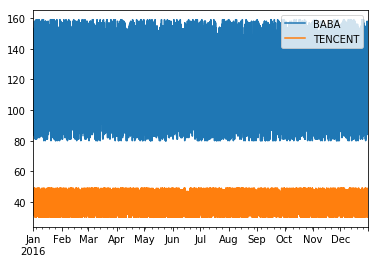

In [16]:
import matplotlib.pyplot as plt
plt.show()

进行采样，使得变成每周

In [17]:
weekly_df = DataFrame()

In [18]:
weekly_df['BABA'] = stock_df['BABA'].resample('W').mean()

In [19]:
weekly_df['TENCENT'] = stock_df['TENCENT'].resample('W').mean()

In [20]:
weekly_df.head()

,BABA,TENCENT
2016-01-03,118.875000,40.263889
2016-01-10,118.857143,38.720238
2016-01-17,120.011905,39.196429
2016-01-24,120.309524,39.738095
2016-01-31,119.285714,39.773810


In [21]:
weekly_df.plot()

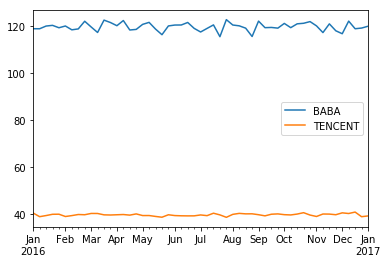

In [22]:
plt.show()